# Data Visualization, Feature Extraction, and Prediction using Logestic Regression with Python
Data Set: [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 
I perform mainly three parts for this project:
### (1) Exploratory Analysis with Data Visualization.
### (2) Feature Engineering (Clean and Extract Feature from the Data Set).
### (3) Build a Prediction Model using Logestic Regression.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np

### (1) Exploratory Analysis with Data Visualization.
Import libraries for visualization.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import The Data

Load the titanic data using pandas into pandas DataFrame


In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

## First Look at the data sets

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### (1) Exploratory Analysis

First, check if there are any missing data.

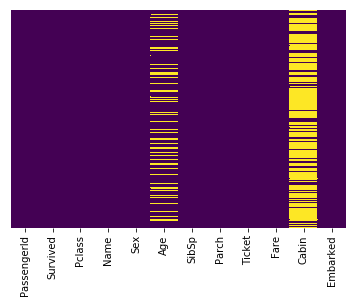

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

use isnull to check if any entry is null and visualized it using heatmap. Here we can see most of Cabin data is missing, so I would consider dismiss this feature. Also, some of the Age data is missing but can be imputed. 

### Visualization
Use barplot to access to the number of passaengers that are survived or not agansted different categorical data such as "Sex" and "Pcalss".

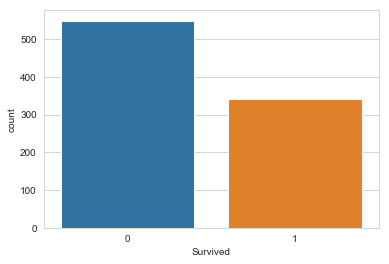

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

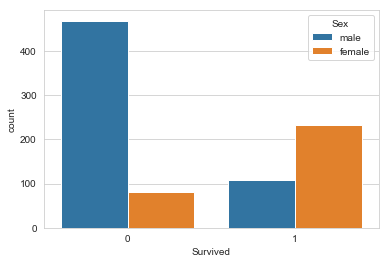

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

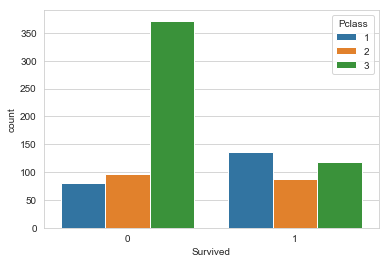

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

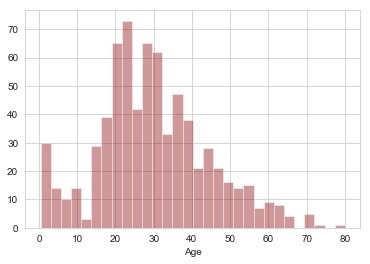

In [10]:
#Age distribution of passengers
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

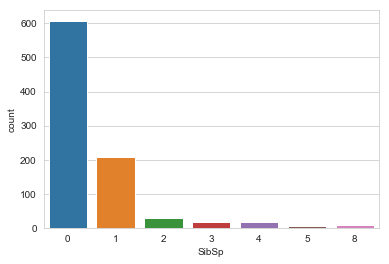

In [11]:
# # of siblins or spouses
sns.countplot(x='SibSp',data=train)

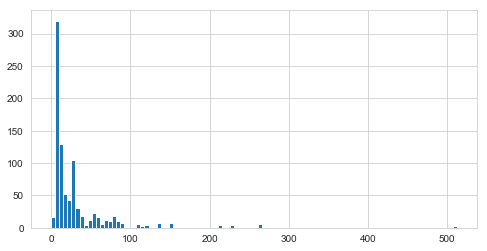

In [12]:
# Fare distribution
train['Fare'].hist(bins=100,figsize=(8,4))

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Fred\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


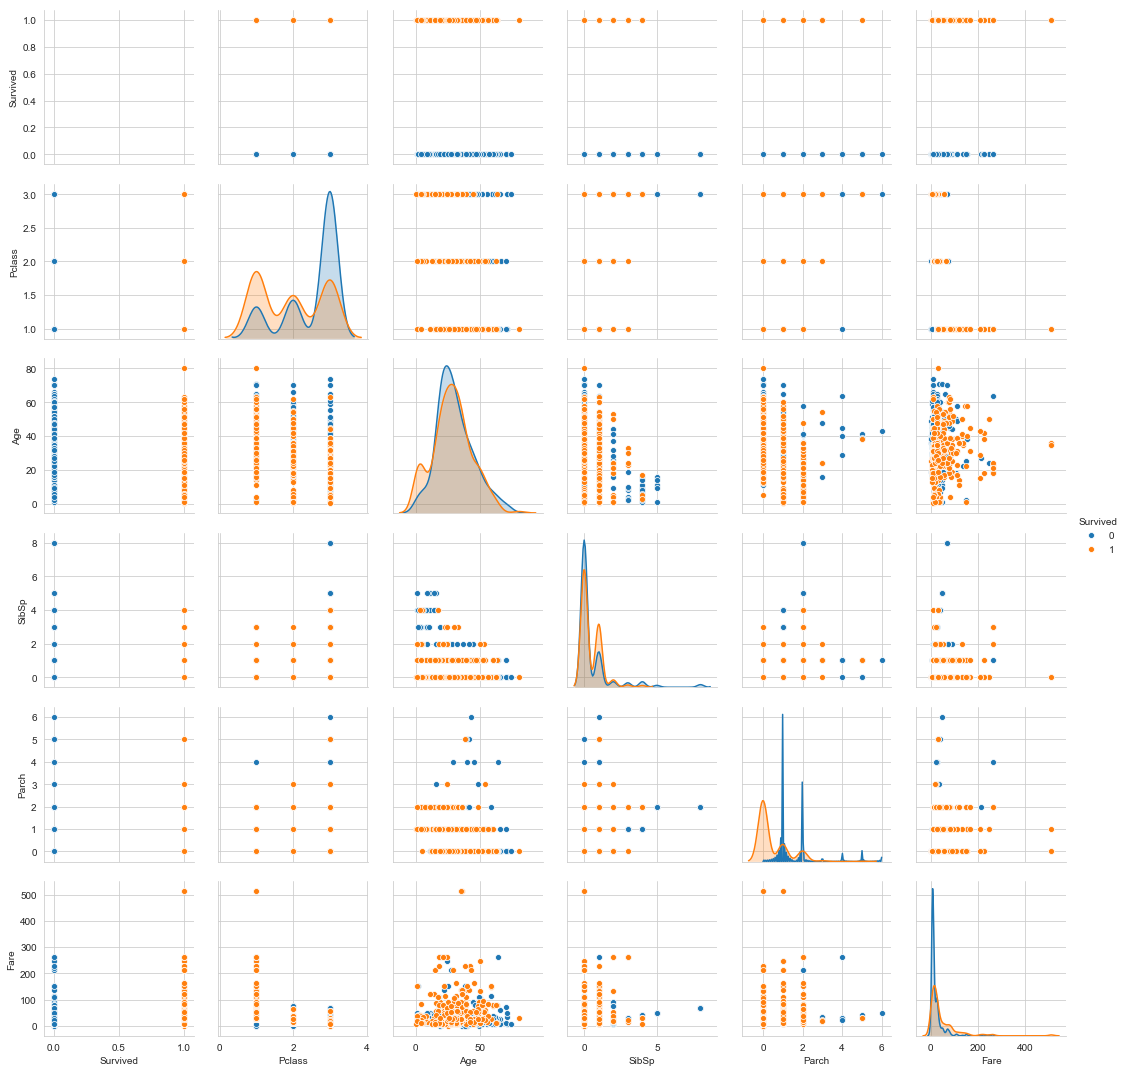

In [14]:
# Generate paired plot with hue = "Survived" to see if any of the feature has obvious sepration of the two groups.
# Drop the non-numerical columns.

sns.pairplot(train.drop(['PassengerId', 'Name','Ticket','Cabin','Embarked'],axis=1),hue = 'Survived')

___
## Fill in missing passanger Age data

Based on the assumption that the older passangers would goes to higher class, the boxplot of Pclass aganst Age shows the similar trand. Therefore, the mean Age of each Pclass is used to fill the missing Age data. 

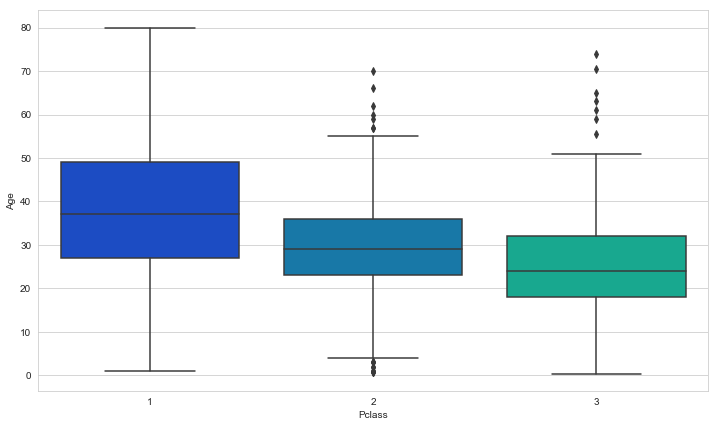

In [15]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

### Calculate the average Age in each class

In [16]:
P_one_age = train[train['Pclass'] == 1]['Age'].mean()
P_two_age = train[train['Pclass'] == 2]['Age'].mean()
P_three_age = train[train['Pclass'] == 3]['Age'].mean()
print('Average Age in Class One : {}'.format(P_one_age))
print('Average Age in Class Two : {}'.format(P_two_age))
print('Average Age in Class Three : {}'.format(P_three_age))


T_one_age = test[test['Pclass'] == 1]['Age'].mean()
T_two_age = test[test['Pclass'] == 2]['Age'].mean()
T_three_age = test[test['Pclass'] == 3]['Age'].mean()
print('T Average Age in Class One : {}'.format(T_one_age))
print('T Average Age in Class Two : {}'.format(T_two_age))
print('T Average Age in Class Three : {}'.format(T_three_age))


Average Age in Class One : 38.233440860215055
Average Age in Class Two : 29.87763005780347
Average Age in Class Three : 25.14061971830986
T Average Age in Class One : 40.91836734693877
T Average Age in Class Two : 28.7775
T Average Age in Class Three : 24.02794520547945


### Fill the missing Age data

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return P_one_age

        elif Pclass == 2:
            return P_two_age

        else:
            return P_three_age

    else:
        return Age

Apply that function.

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Drop the Cabin data since it has too many missing entries.

In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [20]:
test.drop('Cabin',axis=1,inplace=True)

In [21]:
train.dropna(inplace=True)

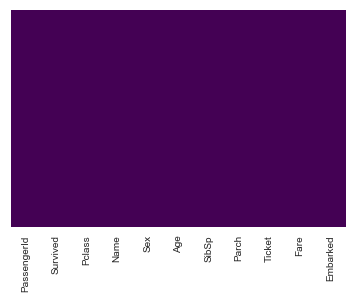

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
train['Name'] = train['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])
test['Name'] = test['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Mr.,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Mrs.,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,Miss.,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,Mrs.,female,35.0,1,0,113803,53.1000,S
4,5,0,3,Mr.,male,35.0,0,0,373450,8.0500,S


In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,Mr.,male,34.5,0,0,330911,7.8292,Q
1,893,3,Mrs.,female,47.0,1,0,363272,7.0000,S
2,894,2,Mr.,male,62.0,0,0,240276,9.6875,Q
3,895,3,Mr.,male,27.0,0,0,315154,8.6625,S
4,896,3,Mrs.,female,22.0,1,1,3101298,12.2875,S


## Converting Categorical Features 

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


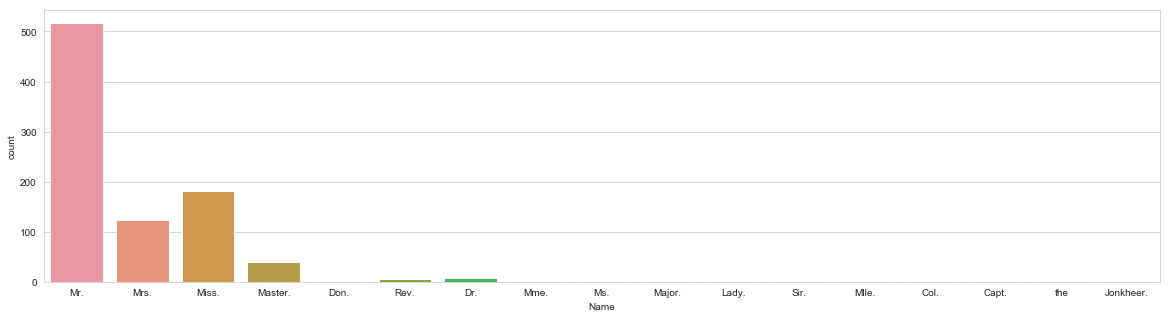

In [28]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
Name = pd.get_dummies(train['Name'])


sex_test = pd.get_dummies(test['Sex'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)
Name_test = pd.get_dummies(test['Name'])


plt.figure(figsize=(20,5))
sns.countplot(train['Name'])



Here we can see most of the name contain Mr., Mrs., Miss, or Master. So I kept these and group all the others to "other"

In [29]:
Name_feature = Name[['Mr.', 'Mrs.', 'Ms.','Miss.']]

Name_feature_test = Name_test[['Mr.', 'Mrs.', 'Ms.','Miss.']]


In [30]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train = pd.concat([train,sex,embark,Name_feature],axis=1)
test = pd.concat([test,sex_test,embark_test,Name_feature_test],axis=1)

In [32]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Mr.,Mrs.,Ms.,Miss.
0,0,3,22.0,1,0,7.2500,1,0,1,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,1,0,0,0


In [33]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Mr.,Mrs.,Ms.,Miss.
0,892,3,34.5,0,0,7.8292,1,1,0,1,0,0,0
1,893,3,47.0,1,0,7.0000,0,0,1,0,1,0,0
2,894,2,62.0,0,0,9.6875,1,1,0,1,0,0,0
3,895,3,27.0,0,0,8.6625,1,0,1,1,0,0,0
4,896,3,22.0,1,1,12.2875,0,0,1,0,1,0,0


### Building a Logistic Regression model


### Train Test Split
Since the test set does not have labels, so in order to evaluate the performance of the model, 30% of the train data is used to do the cross validation.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30,random_state = 101)

### Training and Predicting

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
predictions = logmodel.predict(X_test)

### Evaluation

Generate the classification report

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       163
           1       0.86      0.70      0.77       104

   micro avg       0.84      0.84      0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.84       267



### Train again using the whole training data and generate the prediction


In [41]:
logmodel_final = LogisticRegression()
logmodel_final.fit(train.drop('Survived',axis=1),train['Survived'])

C:\Users\Fred\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
test['Fare'] =  test['Fare'].replace(np.nan,test['Fare'].mean()) 
prediction_final = pd.DataFrame(logmodel_final.predict(test.drop('PassengerId',axis=1)) ,index = test['PassengerId'],columns =['Survived'])
prediction_final.index.name = 'PassengerID'

In [45]:
prediction_final.to_csv('Titanic_Prediction_result.csv') #Save the result

In [46]:
prediction_final.head()

,Survived
PassengerID,
892,0
893,1
894,0
895,0
896,1
